In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
from gui.output_utils import *

query = {'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
         'expansions__vectors__dimensionality': 100,
         'expansions__vectors__rep': 0,
         'expansions__vectors__unlabelled': 'turian'}

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


ids are [38, 39, 40, 41, 42]
Calculating CI for exp 38
Calculating CI for exp 39
Calculating CI for exp 40
Calculating CI for exp 41
Calculating CI for exp 42
Algorithm has 2500 values
Features has 2500 values
Accuracy has 2500 values
Composer has 2500 values
folds has 2500 values


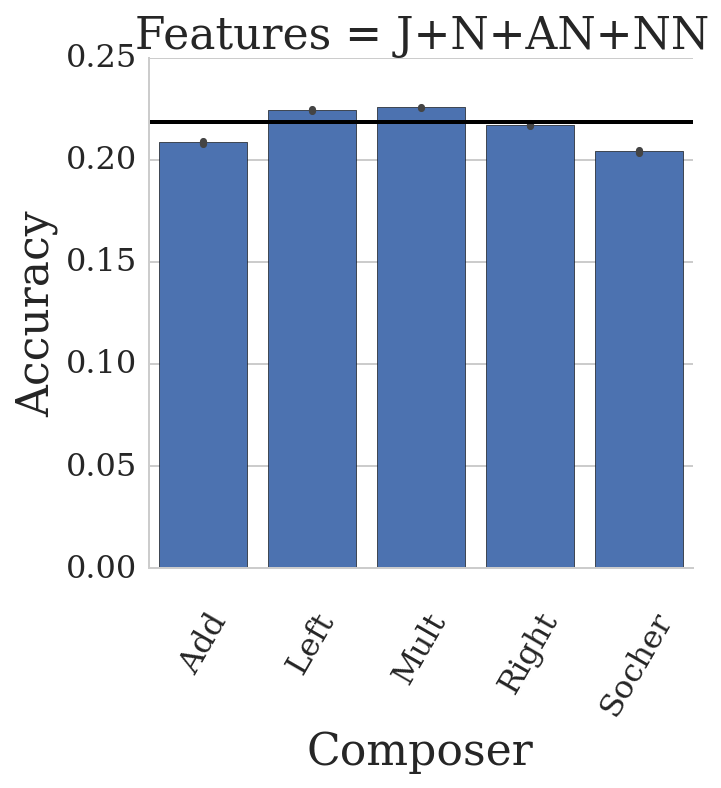

In [2]:
ids = Experiment.objects.filter(**query).values_list('id', flat=True)
print('ids are', ids)
df = dataframe_from_exp_ids(ids, {'Algorithm':'expansions__vectors__algorithm', 
                                  'Composer':'expansions__vectors__composer',
                                 'Features': 'document_features_tr'})
grid = sns.factorplot(hue='Algorithm', y='Accuracy', data=df, 
                      x='Composer', col='Features',
                      kind='bar', legend=False);
grid.set_xticklabels(rotation=60);
for ax in grid.axes.flat:
#     ax.axhline(nondistributional_baseline(), c='k')
    ax.axhline(random_vect_baseline(), c='k')
plt.savefig('plot-turian-different-composers.pdf', format='pdf', dpi=300)

In [3]:
df.head()

,Accuracy,Algorithm,Composer,Features,folds
0,0.188823,turian,Add,J+N+AN+NN,0
1,0.191138,turian,Add,J+N+AN+NN,1
2,0.191468,turian,Add,J+N+AN+NN,2
3,0.191799,turian,Add,J+N+AN+NN,3
4,0.191799,turian,Add,J+N+AN+NN,4


In [4]:
def f1(x):
    return '%1.2f' % x

# ddf = df.drop('folds', axis=1).groupby(['Composer', 'k']).agg([np.mean, np.std])
# ddf.columns = ddf.columns.droplevel(0)#.reset_index()
# ddf['Accuracy'] = ddf['mean'].map(f1) + "$\pm$" + ddf['std'].map(f1)
# ddf = ddf.drop(['mean', 'std'], axis=1).reset_index()
# print(ddf.pivot_table(values='Accuracy', index='k', 
#                       columns='Composer', aggfunc=lambda x: x).to_latex(escape=False))

ddf = df.drop(['folds', 'Algorithm'], axis=1).groupby(['Composer', 'Features']).agg('mean').reset_index() # no need to drop unwanted columns
res = ddf.pivot_table(values='Accuracy', index='Composer', columns='Features')
print(res.to_latex(float_format=f1, na_rep='N/A'))
res.T

\begin{tabular}{lr}
\toprule
Features &  J+N+AN+NN \\
\midrule
Composer &            \\
Add      &       0.21 \\
Left     &       0.22 \\
Mult     &       0.23 \\
Right    &       0.22 \\
Socher   &       0.20 \\
\bottomrule
\end{tabular}



Composer,Add,Left,Mult,Right,Socher
Features,,,,,
J+N+AN+NN,0.208615,0.224618,0.225724,0.217248,0.204364


In [5]:
del res.index.name
del res.columns.name
for c in res.columns:
    print(res[[c]].to_latex(float_format=f1, na_rep='N/A'))
res[[c]]

\begin{tabular}{lr}
\toprule
{} &  J+N+AN+NN \\
\midrule
Add    &       0.21 \\
Left   &       0.22 \\
Mult   &       0.23 \\
Right  &       0.22 \\
Socher &       0.20 \\
\bottomrule
\end{tabular}



,J+N+AN+NN
Add,0.208615
Left,0.224618
Mult,0.225724
Right,0.217248
Socher,0.204364


In [6]:
ddf.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [7]:
del res.index.name
res

AttributeError: name

In [ ]:
del res.columns.name
res